# Exploratory data analysis
### EDA de una base de datos de kaggle para clasificar fotos perros y gatos

In [1]:
# importar librerías & ajustes
import os
import random
from collections import Counter
import kagglehub
from PIL import Image, UnidentifiedImageError, ImageFile
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# descargar el dataset
path = kagglehub.dataset_download(
    "bhavikjikadara/dog-and-cat-classification-dataset"
)
print("ruta base del dataset:", path)

data_dir = os.path.join(path, "PetImages")
print("carpeta de imágenes:", data_dir)

cat_dir = os.path.join(data_dir, "Cat")
dog_dir = os.path.join(data_dir, "Dog")

cat_paths = [
    os.path.join(cat_dir, f)
    for f in os.listdir(cat_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tiff"))
]
dog_paths = [
    os.path.join(dog_dir, f)
    for f in os.listdir(dog_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".tiff"))
]

print(f"total de paths encontrados - cats: {len(cat_paths)}, dogs: {len(dog_paths)}")

Using Colab cache for faster access to the 'dog-and-cat-classification-dataset' dataset.
ruta base del dataset: /kaggle/input/dog-and-cat-classification-dataset
carpeta de imágenes: /kaggle/input/dog-and-cat-classification-dataset/PetImages
total de paths encontrados - cats: 12499, dogs: 12499


Revisión de imágenes corruptas

In [3]:
# gatitos
cat_valid = 0
cat_corrupted = 0

# contar imágenes válidas & corruptas
for p in cat_paths:
    try:
        with Image.open(p) as img:
            img.verify()  # solo verificar y no cargar toda la imagen
        cat_valid += 1
    except (UnidentifiedImageError, OSError):
        cat_corrupted += 1

cat_sizes = []
for p in cat_paths:
    try:
        with Image.open(p) as img:
            w, h = img.size
            cat_sizes.append((w, h))
    except Exception:
        continue

In [4]:
# perritos
dog_valid = 0
dog_corrupted = 0

for p in dog_paths:
    try:
        with Image.open(p) as img:
            img.verify()
        dog_valid += 1
    except (UnidentifiedImageError, OSError):
        dog_corrupted += 1

dog_sizes = []
for p in dog_paths:
    try:
        with Image.open(p) as img:
            w, h = img.size
            dog_sizes.append((w, h))
    except Exception:
        continue

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [5]:
# totales
total_valid = cat_valid + dog_valid
total_corrupted = cat_corrupted + dog_corrupted
total_imgs = total_valid + total_corrupted

Estadísticas de tamaños

In [6]:
cat_stats = None
dog_stats = None

if cat_sizes:
    cat_widths = [s[0] for s in cat_sizes]
    cat_heights = [s[1] for s in cat_sizes]

    cat_avg_w = sum(cat_widths) / len(cat_widths)
    cat_avg_h = sum(cat_heights) / len(cat_heights)

    cat_size_counts = Counter(cat_sizes)
    cat_most_common_size, cat_most_common_freq = cat_size_counts.most_common(1)[0]

    cat_stats = {
        "avg_width": cat_avg_w,
        "avg_height": cat_avg_h,
        "most_common_size": cat_most_common_size,
        "most_common_freq": cat_most_common_freq,
        "n": len(cat_sizes),
    }

if dog_sizes:
    dog_widths = [s[0] for s in dog_sizes]
    dog_heights = [s[1] for s in dog_sizes]

    dog_avg_w = sum(dog_widths) / len(dog_widths)
    dog_avg_h = sum(dog_heights) / len(dog_heights)

    dog_size_counts = Counter(dog_sizes)
    dog_most_common_size, dog_most_common_freq = dog_size_counts.most_common(1)[0]

    dog_stats = {
        "avg_width": dog_avg_w,
        "avg_height": dog_avg_h,
        "most_common_size": dog_most_common_size,
        "most_common_freq": dog_most_common_freq,
        "n": len(dog_sizes),
    }

Resumen del EDA

In [7]:
print(f"Imágenes válidas - cats: {cat_valid}, dogs: {dog_valid}, total: {total_valid}")
print(
    f"Imágenes corruptas - cats: {cat_corrupted}, dogs: {dog_corrupted}, "
    f"Total: {total_corrupted}"
)

if cat_stats:
    print(f"\ntamaños Cats (muestra {cat_stats['n']}):")
    print(f"ancho promedio: {cat_stats['avg_width']:.2f}")
    print(f"alto promedio:  {cat_stats['avg_height']:.2f}")
    print(
        f"tamaño más frecuente: {cat_stats['most_common_size']} "
        f"(frecuencia: {cat_stats['most_common_freq']})"
    )

if dog_stats:
    print(f"\ntamaños Dogs (muestra {dog_stats['n']}):")
    print(f"ancho promedio: {dog_stats['avg_width']:.2f}")
    print(f"alto promedio:  {dog_stats['avg_height']:.2f}")
    print(
        f"tamaño más frecuente: {dog_stats['most_common_size']} "
        f"(frecuencia: {dog_stats['most_common_freq']})"
    )

Imágenes válidas - cats: 12499, dogs: 12499, total: 24998
Imágenes corruptas - cats: 0, dogs: 0, Total: 0

tamaños Cats (muestra 12499):
ancho promedio: 410.84
alto promedio:  356.94
tamaño más frecuente: (500, 375) (frecuencia: 3208)

tamaños Dogs (muestra 12499):
ancho promedio: 398.06
alto promedio:  365.04
tamaño más frecuente: (500, 375) (frecuencia: 2659)


## Hallazgos :)

**Balance entre clases**

In [8]:
perc_cats = 100 * cat_valid / total_valid
perc_dogs = 100 * dog_valid / total_valid
print(  f"{perc_cats:.1f}% de las imágenes válidas son de gatos y el "
        f"{perc_dogs:.1f}% son de perros, lo que reduce el riesgo de sesgo "
        f"en el entrenamiento del modelo."
    )

50.0% de las imágenes válidas son de gatos y el 50.0% son de perros, lo que reduce el riesgo de sesgo en el entrenamiento del modelo.


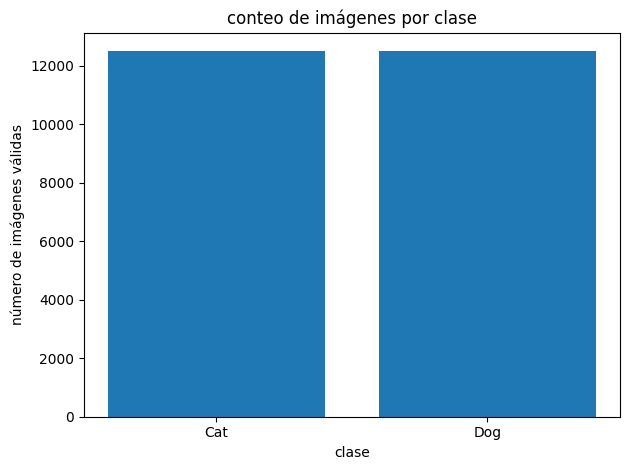

In [9]:
plt.figure()
plt.bar(["Cat", "Dog"], [cat_valid, dog_valid])
plt.xlabel("clase")
plt.ylabel("número de imágenes válidas")
plt.title("conteo de imágenes por clase")
plt.tight_layout()
plt.show()

**Imágenes válidas vs. corruptas:**

In [10]:
perc_corrupted = 100 * total_corrupted / total_imgs
print(
        f"Se encontró un {perc_corrupted:.2f}% de imágenes corruptas "
        f"({total_corrupted} de {total_imgs}). O sea, no hay imágenes nulas."
    )

Se encontró un 0.00% de imágenes corruptas (0 de 24998). O sea, no hay imágenes nulas.


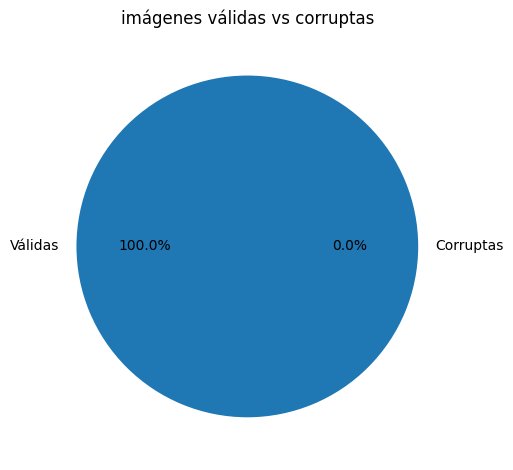

In [11]:
plt.figure()
plt.pie(
            [total_valid, total_corrupted],
            labels=["Válidas", "Corruptas"],
            autopct="%1.1f%%",
        )
plt.title("imágenes válidas vs corruptas")
plt.tight_layout()
plt.show()

**Tamaño promedio en cada clase**

In [12]:
print(
    f"(Cats ≈ {cat_stats['avg_width']:.0f}×{cat_stats['avg_height']:.0f}, "
    f"Dogs ≈ {dog_stats['avg_width']:.0f}×{dog_stats['avg_height']:.0f}). "
)

(Cats ≈ 411×357, Dogs ≈ 398×365). 


Los tamaños promedio de las imágenes de gatos y perros son muy similares y   no hay diferencias fuertes de resolución entre clases.

**Tamaño dominante**

In [30]:
print(cat_stats["most_common_size"] == dog_stats["most_common_size"])

True


In [33]:
mc = cat_stats["most_common_size"]
print(f"Ambas clases comparten un tamaño dominante muy claro {mc}")

Ambas clases comparten un tamaño dominante muy claro (500, 375).


Esto sugiere que gran parte del dataset proviene de una misma fuente.

**Variabilidad en las resoluciones**

In [15]:
all_sizes = cat_sizes + dog_sizes

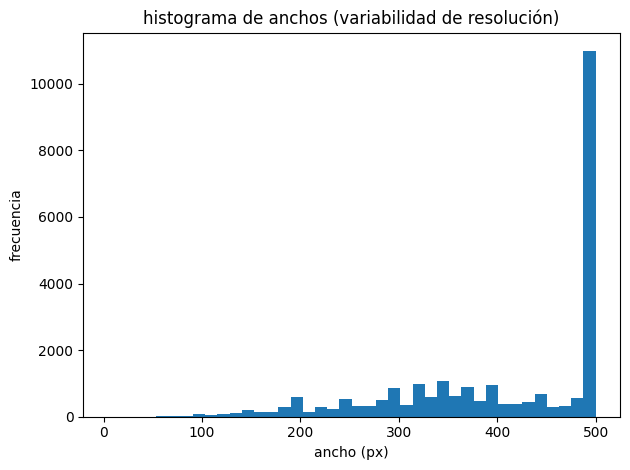

In [16]:
widths_all = [w for (w, h) in all_sizes]
plt.figure()
plt.hist(widths_all, bins=40)
plt.xlabel("ancho (px)")
plt.ylabel("frecuencia")
plt.title("histograma de anchos (variabilidad de resolución)")
plt.tight_layout()
plt.show()

 A pesar de existir un tamaño dominante, el histograma de anchos muestra variabilidad moderada en las resoluciones. Esto hace necesario redimensionar las imágenes a un tamaño común antes de entrenar una red neuronal.

**Aspect ratio promedio**

In [23]:
avg_ar_cats = cat_stats["avg_width"] / cat_stats["avg_height"]
avg_ar_dogs = dog_stats["avg_width"] / dog_stats["avg_height"]
print(f"El aspect ratio promedio es ligeramente horizontal en ambas clases "
      f"(cats ≈ {avg_ar_cats:.2f}, dogs ≈ {avg_ar_dogs:.2f})")
print("\nEs decir, hay más imágenes horizontales que verticales o cuadradas.")

el aspect ratio promedio es ligeramente horizontal en ambas clases (cats ≈ 1.15, dogs ≈ 1.09)

es decir, hay más imágenes horizontales que verticales o cuadradas.


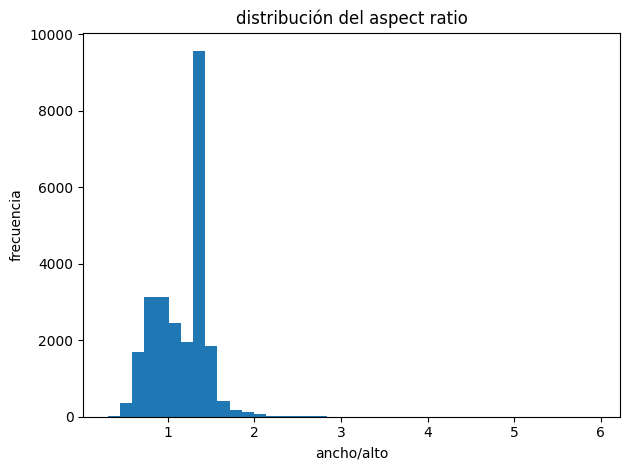

In [24]:
aspect_ratios = [w / h for (w, h) in all_sizes if h != 0]

plt.figure()
plt.hist(aspect_ratios, bins=40)
plt.xlabel("ancho/alto")
plt.ylabel("frecuencia")
plt.title("distribución del aspect ratio")
plt.tight_layout()
plt.show()

**Área promedio**

In [25]:
avg_area_cats = cat_stats["avg_width"] * cat_stats["avg_height"]
avg_area_dogs = dog_stats["avg_width"] * dog_stats["avg_height"]
print(f"La resolución promedio es relativamente grande comparada con el que se usaría para entrenar la red (cats ≈ {avg_area_cats:.0f} pixeles, dogs ≈ {avg_area_dogs:.0f} pixeles)")

La resolución promedio es relativamente grande comparada con el que se usaría para entrenar la red (cats ≈ 146645 pixeles, dogs ≈ 145306 pixeles)


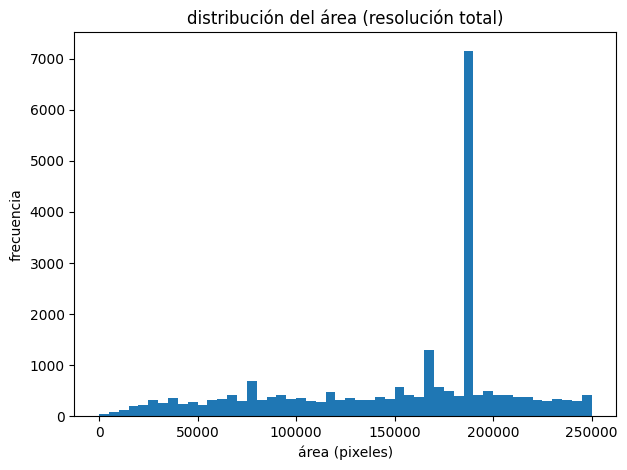

In [26]:
areas = [w * h for (w, h) in all_sizes]

plt.figure()
plt.hist(areas, bins=50)
plt.xlabel("área (pixeles)")
plt.ylabel("frecuencia")
plt.title("distribución del área (resolución total)")
plt.tight_layout()
plt.show()